# Systems of Nonlinear Systems Example
## CH EN 2450 - Numerical Methods


In [1]:
import numpy as np
from numpy import cos, sin, pi, exp
from scipy.optimize import fsolve
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

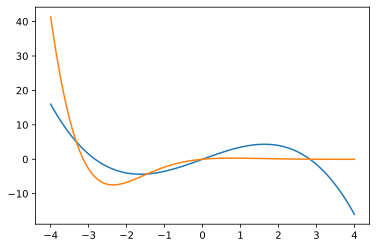

In [2]:
def y1(x):
    return 4*x - 0.5*x**3

y1 = lambda x: 4*x - 0.5*x**3
y2 = lambda x: sin(x)*exp(-x)

x = np.linspace(-4, 4, 100)
plt.plot(x, y1(x), x, y2(x))
plt.show()

In [14]:
def residual_vector(xvals):
    x = xvals[0]
    y = xvals[1]
    r1 = .5*x**3 + y - 4*x
    r2 = y - sin(x)*exp(-x)
    return np.array([r1, r2])


def jacobian(xvals):
    x = xvals[0]
    y = xvals[1]
    return np.array([[1.5*x**2 - 4, 1],
                     [-cos(x)*exp(-x) + sin(x)*exp(-x), 1]])


def newton_solver(res_func, jac_func, xguess, tol):
    r_val = res_func(xguess)
    err = np.linalg.norm(r_val, 2)  # l2 vector norm
    niter = 0
    x = xguess
    while abs(err) > tol and niter < 300:
        j_val = jac_func(x)  # jacobian matrix
        delta = np.linalg.solve(j_val, -r_val)
        x += delta
        r_val = res_func(x)
        err = np.linalg.norm(r_val, 2)
        niter += 1
    return x, niter, err
        

In [15]:
fsolve(residual_vector, [-1, -3])

array([-1.46110592, -4.28481694])

In [16]:
fsolve(residual_vector, [-3, 5])

array([-3.32550287,  5.08630572])

In [17]:
fsolve(residual_vector, [0.1, -0.1])

array([0., 0.])

In [18]:
fsolve(residual_vector, [2, 1])

array([2.82612678, 0.01838035])

In [19]:
newton_solver(residual_vector, jacobian, [-1, -3], 1e-5)

(array([-1.46110847, -4.28482727]), 4, 8.49213206380889e-06)